
# Plotting the base pairs of a tRNA-like-structure

In this example we plot a linear secondary-structure diagram of a tRNA
mimic (PDB ID: 4P5J) from the *turnip yellow mosaic virus* (TYMV).


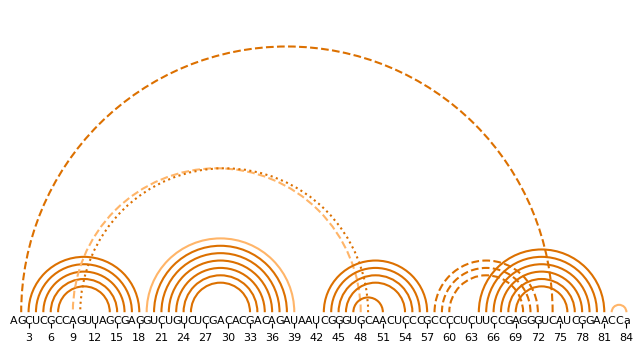

In [1]:
# Code source: Tom David Müller
# License: BSD 3 clause

from tempfile import gettempdir
import biotite
import biotite.structure.io.pdb as pdb
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.sequence.graphics as graphics
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Arc
import numpy as np

# Download the PDB file and read the structure
pdb_file_path = rcsb.fetch("4p5j", "pdb", gettempdir())
pdb_file = pdb.PDBFile.read(pdb_file_path)
atom_array = pdb.get_structure(pdb_file)[0]
nucleotides = atom_array[struc.filter_nucleotides(atom_array)]

# Get the residue names and residue ids of the nucleotides
residue_ids = []
residue_names = []
for residue in struc.residue_iter(nucleotides):
    mapped_nucleotide, exact_match = struc.map_nucleotide(residue)
    if mapped_nucleotide is None:
        continue
    residue_ids.append(residue[0].res_id)
    if exact_match:
        residue_names.append(mapped_nucleotide)
    else:
        residue_names.append(mapped_nucleotide.lower())

# Create a matplotlib pyplot
fig, ax = plt.subplots(figsize=(8.0, 4.5))

# Setup the axis
ax.set_xlim(0.5, len(residue_ids) + 0.5)
ax.set_ylim(0, len(residue_ids)/2 + 0.5)
ax.set_aspect("equal")
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_yticks([])

# Remove the frame
plt.box(False)

# Plot the residue names in order
for residue_name, residue_id in zip(residue_names, residue_ids):
    ax.text(residue_id, 0, residue_name, ha='center', fontsize=8)

# Compute the basepairs and pseudknot order (first result)
base_pairs = struc.base_pairs(nucleotides)
pseudoknot_order = struc.pseudoknots(base_pairs)[0]

# Draw the arcs between base pairs
for (base1, base2), order in zip(base_pairs, pseudoknot_order):
    arc_center = (
        np.mean((nucleotides.res_id[base1],nucleotides.res_id[base2])), 1.5
    )
    arc_diameter = abs(nucleotides.res_id[base2] - nucleotides.res_id[base1])
    name1 = nucleotides.res_name[base1]
    name2 = nucleotides.res_name[base2]
    if sorted([name1, name2]) in [["A", "U"], ["C", "G"]]:
        color = biotite.colors["dimorange"]
    else:
        color = biotite.colors["brightorange"]
    if order == 0:
        linestyle = "-"
    elif order == 1:
        linestyle = "--"
    else:
        linestyle = ":"
    arc = Arc(
        arc_center, arc_diameter, arc_diameter, theta1=0, theta2=180,
        color=color, linewidth=1.5, linestyle=linestyle
    )
    ax.add_patch(arc)

# Display the plot
plt.show()